In [1]:
import numpy as np
import pyfits
import os
import re
import matplotlib.pyplot as plt

In [3]:
path = 'data'

In [22]:
def average_spec(f):
    
    '''Takes the average spectra from the open fits file.'''
    
    spec = []
    for i in range(1,21):
        spec.append(f[i].data['auto0_real'])
    
    spec = np.array(spec)
    spec.reshape(20,-1)
    avg = np.mean(spec, axis=0)
    
    return avg

In [32]:
llen = 253
blen = 41
spectra = np.zeros([llen,blen], dtype=object)

for name in os.listdir(path):
    f = pyfits.open(path+'/'+name)
    spec = average_spec(f)
    pattern = re.compile(r'-?\d+')
    nums = pattern.findall(name)
    l = float(nums[0])
    b = float(nums[2])
    bloc = b + 20
    spectra[int(l),int(bloc)] = spec

In [33]:
np.savez('allspectra.npz', data=spectra)

In [34]:
spectra = np.load('allspectra.npz')['data']

In [35]:
plt.plot(spectra[240,18][3000:5500])
plt.show()

In [36]:
type(spectra[126,18])

numpy.ndarray

In [38]:
shapespec = spectra.shape
peaktemps = np.zeros((shapespec[0]+3, shapespec[1]+2))
for l in range(shapespec[0]):
    for b in range(shapespec[1]):
        s = spectra[l,b]
        if isinstance(s, (np.ndarray)):
            peaktemps[l,b] = max(s[3800:4700])
            peaktemps[l+1,b] = max(s[3800:4700])
            peaktemps[l+2,b] = max(s[3800:4700])
            peaktemps[l+3,b] = max(s[3800:4700])
            peaktemps[l,b+1] = max(s[3800:4700])
            peaktemps[l+1,b+1] = max(s[3800:4700])
            peaktemps[l+2,b+1] = max(s[3800:4700])
            peaktemps[l+3,b+1] = max(s[3800:4700])

<IPython.core.display.Javascript object>


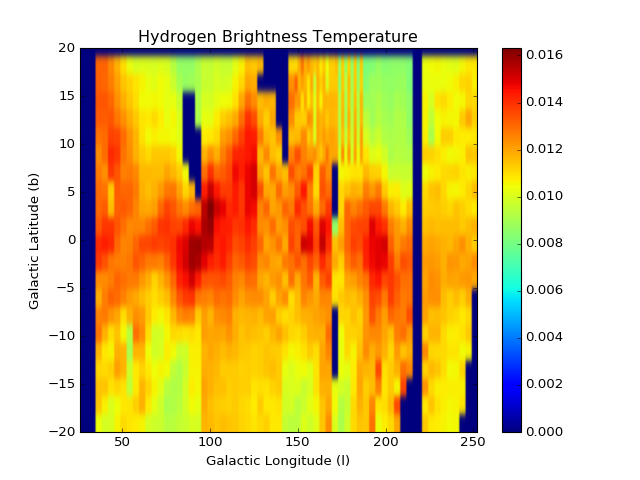

In [46]:
%matplotlib notebook
plt.imshow(peaktemps.T,aspect='auto', origin='bottom', interpolation='gaussian', extent=[26,252,-20,20])
plt.ylabel("Galactic Latitude (b)")
plt.xlabel('Galactic Longitude (l)')
plt.title('Hydrogen Brightness Temperature')
plt.colorbar()
plt.savefig('galactic.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.plot(spectra[74,0])